# Finding Donars based on Income: Classification Problem

## Introduction

There are various oraganizations which survives on donations. By understanding an individual's income helps a non-profit organizations better understand how large of a donation to request. 

While it is difficult to determine an individual's general income bracket directly from public sources, we can use Machine Learning to predict or infer their income from publically available features.

## Problem Statement

Our ultimate goal is to predict whether an individual make more than $50,000/yr on census data also known as "Adult" dataset.

## Data Description

Data Extraction was done by Barry Becker from 1994 U.S. Census database.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income).

Attribute Information:

* income(target): **>50K, <=50K**

* age: continuous.

* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.

* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* education-num: continuous.

* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

* sex: Female, Male.

* capital-gain: continuous.

* capital-loss: continuous.

* hours-per-week: continuous.

* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
# import necessary libraries
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
pd.set_option('display.max_rows', None)
%matplotlib inline

## Load Dataset

In [3]:
df = pd.read_csv('census.csv')

df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Understanding the data

In [4]:
df.shape

(45222, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [6]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f'Numerical Columns: \n {num_cols}\n')

cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print(f'Categorical Columns: \n {cat_cols}')

Numerical Columns: 
 ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

Categorical Columns: 
 ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


**Findings:**
* Number of samples: 45222, Number of features: 14
* No Missing values in the dataset.
* Type of Data: Numerical, Categorical
* No Spaces on both ends of the column names.
* Skewness in `capital-gain` and `capital-loss` as mean value is greater than median value.

## Exploratory Data Analysis(EDA)

### Distribution of `income`

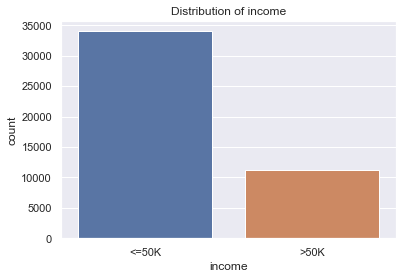

In [8]:
sns.countplot(df['income'])
plt.title('Distribution of income');

**Findings:**
* Target Variable i.e. `income` is highly imbalanced(Class Imbalance Problem). This may introduce biasness in our model.
* Different techniques are used to treat the Class Imbalance Problem like Undersampling, Oversampling, Introduction of weights etc.

**NOTE:** We will fix this in Data Preprocessing step.

### Distribution of `capital-gain` and `capital-loss`

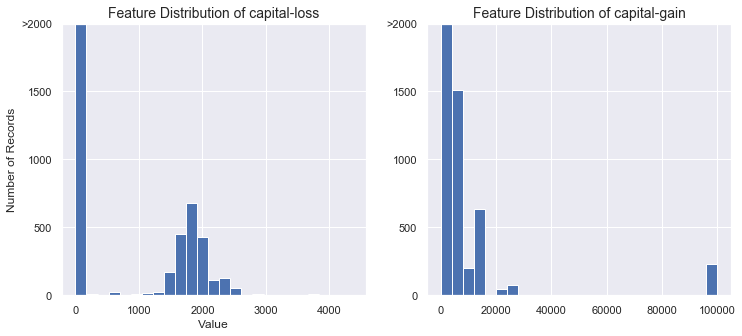

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df['capital-loss'], bins=25)
ax1.set_xlabel("Value")
ax1.set_ylabel("Number of Records")
ax1.set_ylim((0, 2000))
ax1.set_yticks([0, 500, 1000, 1500, 2000])
ax1.set_yticklabels([0, 500, 1000, 1500, ">2000"])
ax1.set_title(f"Feature Distribution of capital-loss", fontsize=14);

ax2.hist(df['capital-gain'], bins=25)
ax2.set_ylim((0, 2000))
ax2.set_yticks([0, 500, 1000, 1500, 2000])
ax2.set_yticklabels([0, 500, 1000, 1500, ">2000"])
ax2.set_title(f"Feature Distribution of capital-gain", fontsize=14);

**Findings:**
* A dataset may sometimes contains at least one feature whose values tends to lie near a single number, but will also have a non-trival number of valstly larger or smaller values and can underperform if the range is not properly normalized.
With this census data, we have such features which falls in this scenario i.e. `capital-loss` and `capital-gain` as seen from the above graph.

* We need to normalize or transform these features.

* For highly-skewed feature distribution, it is common practice to apply a **Logarithmic Transformation** on the data so that very large and very small values do not negatively effect the performance of our model.